# <font color=darkred>Laboratory 27</font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook lab 27
## Date: 11/17

### Let's go over some important terminology:

    Linear Regression:
    a basic predictive analytics technique that uses historical data to predict an output variable.

    The Predictor variable (input):
    the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
    
    The Output variable:
    the variable that we want to predict. It is commonly referred to as Y.
    
#### To estimate Y using linear regression, we assume the equation: $Ye = βX + α$
*where Yₑ is the estimated or predicted value of Y based on our linear equation.* <br>

#### Our goal is to find statistically significant values of the parameters α and β that minimise the difference between Y and Yₑ. If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of Y, given the value of X. <br>

## So, how do we estimate α and β? <br>
![](https://media3.giphy.com/media/EijsQdawZkiqY/200.gif) <br>

#### We can use a method called Ordinary Least Squares (OLS). <br>
![](https://miro.medium.com/max/338/1*VVA0rF6MWXcw1JmRNFA87g.png) <br>

#### The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ (distance between the linear fit and the observed points). We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows: <br>
![](https://miro.medium.com/max/222/0*gR-W7RFar9ijxwAa) <br>
#### where X̄ is the mean of X values and Ȳ is the mean of Y values. β is simply the covariance of X and Y (Cov(X, Y)  devided by the variance of X (Var(X)). <br>

    Covariance:
    In probability theory and statistics, covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.
![](https://www.wallstreetmojo.com/wp-content/uploads/2019/03/Covariance-Formula.jpg) <br>
![](https://media.geeksforgeeks.org/wp-content/uploads/Correl.png) <br>
    
    The Correlation Coefficient:
    Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient, but the most popular is Pearson’s. Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.Correlation coefficient formulas are used to find how strong a relationship is between data.
    
    The formulas return a value between -1 and 1

    1 : A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
    -1: A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
    0 : Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.


#### We had a table of recoded times and speeds from some experimental observations:

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 
|7.0 | 60.3 |
|8.0 | 77.7 |
|9.0 | 97.3 |
|10.0| 121.1|

#### First let's create a dataframe:


In [2]:
# Load the necessary packages
import numpy as np
import pandas as pd
import statistics 
from matplotlib import pyplot as plt

# Create a dataframe:
time = [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
speed = [0, 3, 7, 12, 20, 30, 45.6, 60.3, 77.7, 97.3, 121.2]
data = pd.DataFrame({'Time':time, 'Speed':speed})
data

,Time,Speed
0,0.0,0.0
1,1.0,3.0
2,2.0,7.0
3,3.0,12.0
4,4.0,20.0
5,5.0,30.0
6,6.0,45.6
7,7.0,60.3
8,8.0,77.7
9,9.0,97.3


#### Now, let's explore the data:


In [3]:
data.describe()

,Time,Speed
count,11.000000,11.000000
mean,5.000000,43.100000
std,3.316625,41.204077
min,0.000000,0.000000
25%,2.500000,9.500000
50%,5.000000,30.000000
75%,7.500000,69.000000
max,10.000000,121.200000


In [4]:
time_var = statistics.variance(time)
speed_var = statistics.variance(speed)

print("Variance of recorded times is ",time_var)
print("Variance of recorded speed is ",speed_var)

Variance of recorded times is  11.0
Variance of recorded speed is  1697.776


#### Is there a relationship ( based on covariance, correlation) between time and speed?

In [5]:
# To find the covariance  
data.cov() 

,Time,Speed
Time,11.00,131.750
Speed,131.75,1697.776


In [6]:
# To find the correlation among the columns 
# using pearson method 
data.corr(method ='pearson') 

,Time,Speed
Time,1.000000,0.964082
Speed,0.964082,1.000000


#### Let's do linear regression with primitive Python:
#### To estimate "y" using the OLS method, we need to calculate "xmean" and "ymean", the covariance of X and y ("xycov"), and the variance of X ("xvar") before we can determine the values for alpha and beta. In our case, X is time and y is Speed.

In [7]:
# Calculate the mean of X and y
xmean = np.mean(time)
ymean = np.mean(speed)

# Calculate the terms needed for the numator and denominator of beta
data['xycov'] = (data['Time'] - xmean) * (data['Speed'] - ymean)
data['xvar'] = (data['Time'] - xmean)**2

# Calculate beta and alpha
beta = data['xycov'].sum() / data['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')


alpha = -16.78636363636363
beta = 11.977272727272727


#### We now have an estimate for alpha and beta! Our model can be written as Yₑ = 11.977 X -16.786, and we can make predictions:

In [8]:
X = np.array(time)

ypred = alpha + beta * X
print(ypred)

[-16.78636364  -4.80909091   7.16818182  19.14545455  31.12272727
  43.1         55.07727273  67.05454545  79.03181818  91.00909091
 102.98636364]


#### Let’s plot our prediction ypred against the actual values of y, to get a better visual understanding of our model:

C:\Users\JONAH\AppData\Local\Temp\ipykernel_8652\1688073443.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time, speed, 'ro', color="blue")   # scatter plot showing actual data


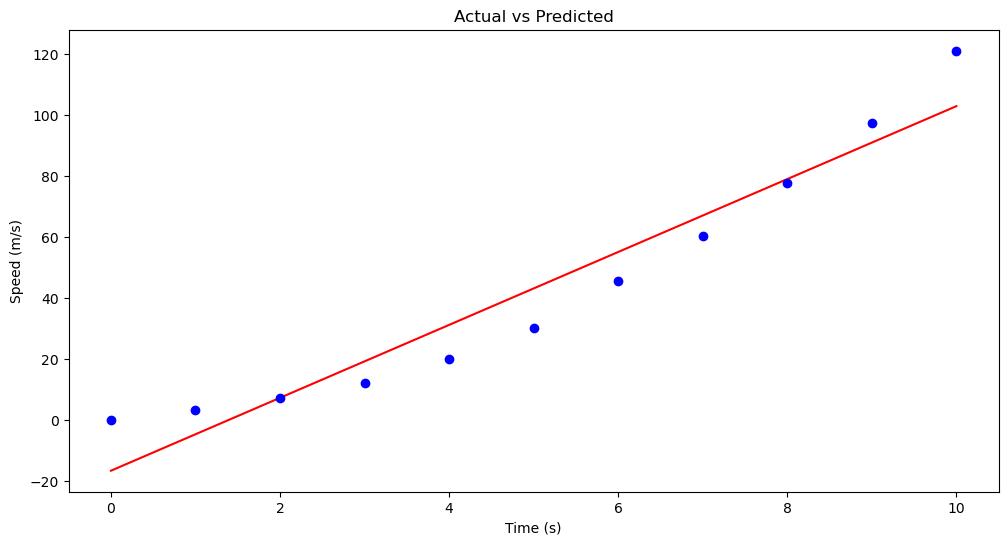

In [9]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred, color="red")     # regression line
plt.plot(time, speed, 'ro', color="blue")   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')

plt.show()

#### The red line is our line of best fit, Yₑ = 11.977 X -16.786. We can see from this graph that there is a positive linear relationship between X and y. Using our model, we can predict y from any values of X! <br>
#### For example, if we had a value X = 20, we can predict that:

In [10]:
ypred_20 = alpha + beta * 20
print(ypred_20)

222.7590909090909


#### Linear Regression with statsmodels:
#### First, we use statsmodels’ ols function to initialise our simple linear regression model. This takes the formula y ~ X, where X is the predictor variable (Time) and y is the output variable (Speed). Then, we fit the model by calling the OLS object’s fit() method.

In [11]:
import statsmodels.formula.api as smf

# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Speed ~ Time', data=data)
model = model.fit()

#### We no longer have to calculate alpha and beta ourselves as this method does it automatically for us! Calling model.params will show us the model’s parameters:

In [12]:
model.params

Intercept   -16.786364
Time         11.977273
dtype: float64

#### In the notation that we have been using, α is the intercept and β is the slope i.e. α =-16.786364 and β = 11.977273.

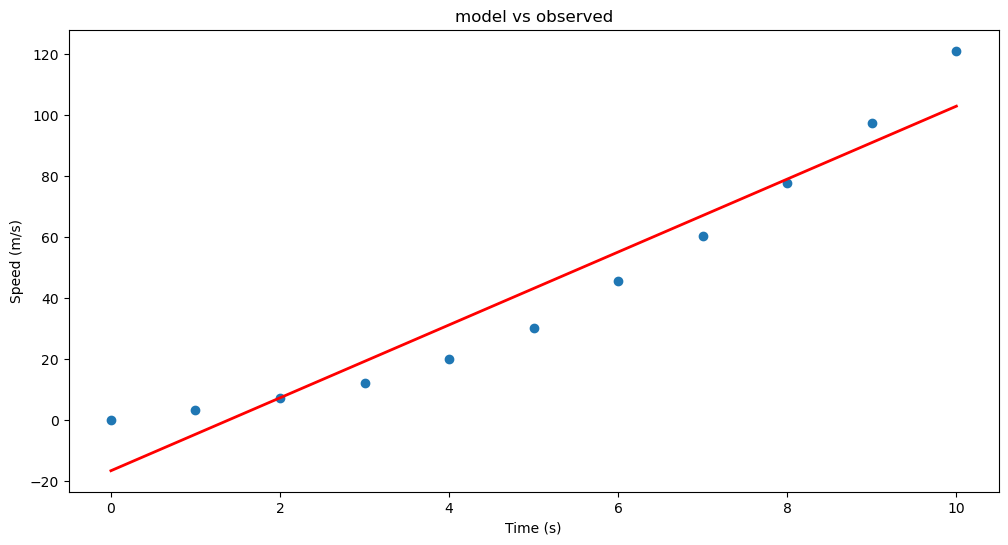

In [13]:
# Predict values
speed_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Speed'], 'o')           # scatter plot showing actual data
plt.plot(data['Time'], speed_pred, 'r', linewidth=2)   # regression line
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('model vs observed')

plt.show()

![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*This notebook was inspired by several blogposts including:*
- __"Introduction to Linear Regression in Python"__ by __Lorraine Li__ available at* https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0 <br>
- __"In Depth: Linear Regression"__ available at* https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html <br>
- __"A friendly introduction to linear regression (using Python)"__ available at* https://www.dataschool.io/linear-regression-in-python/ <br>
- __"What is Maximum Likelihood Estimation — Examples in Python"__ by __Robert R.F. DeFilippi__ available at* https://medium.com/@rrfd/what-is-maximum-likelihood-estimation-examples-in-python-791153818030 <br>
- __"Linear Regression"__ by __William Fleshman__  available at* https://towardsdatascience.com/linear-regression-91eeae7d6a2e <br>
- __"Regression Accuracy Check in Python (MAE, MSE, RMSE, R-Squared)"__ available at* https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html <br>

*Here are some great reads on these topics:* 
- __"Linear Regression in Python"__ by __Sadrach Pierre__ available at* https://towardsdatascience.com/linear-regression-in-python-a1d8c13f3242 <br>
- __"Introduction to Linear Regression in Python"__ available at* https://cmdlinetips.com/2019/09/introduction-to-linear-regression-in-python/ <br>
- __"Linear Regression in Python"__ by __Mirko Stojiljković__ available at* https://realpython.com/linear-regression-in-python/ <br>
- __"A Gentle Introduction to Linear Regression With Maximum Likelihood Estimation"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/ <br>
- __"Metrics To Evaluate Machine Learning Algorithms in Python"__ by __Jason Brownlee__ available at* https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/ <br>
- __"A Gentle Introduction to Maximum Likelihood Estimation"__ by __Jonathan Balaban__ available at* https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f <br>
- __"Regression: An Explanation of Regression Metrics And What Can Go Wrong"__ by __Divyanshu Mishra__ available at* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914 <br>
- __"Tutorial: Understanding Regression Error Metrics in Python"__ available at* https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>

*Here are some great videos on these topics:* 
- __"StatQuest: Fitting a line to data, aka least squares, aka linear regression."__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=PaFPbb66DxQ&list=PLblh5JKOoLUIzaEkCLIUxQFjPIlapw8nU <br>
- __"Statistics 101: Linear Regression, The Very Basics"__ by __Brandon Foltz__ available at* https://www.youtube.com/watch?v=ZkjP5RJLQF4 <br>
- __"How to Build a Linear Regression Model in Python | Part 1" and 2,3,4!__ by __Sigma Coding__ available at* https://www.youtube.com/watch?v=MRm5sBfdBBQ <br>
- __"StatQuest: Maximum Likelihood, clearly explained!!!"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=XepXtl9YKwc <br>
- __"Maximum Likelihood for Regression Coefficients (part 1 of 3)" and part 2 and 3__ by __Professor Knudson__ available at* https://www.youtube.com/watch?v=avs4V7wBRw0 <br>
- __"StatQuest: R-squared explained"__ by __StatQuest with Josh Starmer__ available at* https://www.youtube.com/watch?v=2AQKmw14mHM <br>

___
![](https://media.csesoc.org.au/content/images/2019/10/learn11.gif) <br>


## Exercise: Linear Regression - Yea or Nay <br>

### List some of the pros and cons of linear regression.

#### _Make sure to cite any resources that you may use._ 

Pros of Linear Regression:
Linear regression is interpretable and computationally efficient, providing a clear understanding of relationships and simplicity in implementation.

Cons of Linear Regression:
However, it assumes linearity, limiting accuracy in nonlinear scenarios, and is sensitive to outliers, impacting model performance 

#### How good do you feel about this predictive model that we created in today's example? Will you trust it? Explain by using the plot.

The model seems trustworthy, you can clearly see the corrolation in the plot